In [39]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Importing the dataset

df = pd.read_csv('df-Clean.csv')
df = df.drop(['pca1', 'pca2'], axis=1)
display(df.head(4))

,rated,winner,increment_code,white_rating,black_rating,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,moves_num,opening_num,midMoves_num
0,1.0,black,0.027778,0.280793,0.257642,0.0,0.0,0.0,1.0,0.000000,0.111111,0.195122
1,1.0,white,0.027778,0.371608,0.388100,0.0,1.0,0.0,0.0,0.365079,0.074074,0.487805
2,1.0,white,0.111111,0.341858,0.362991,0.0,1.0,0.0,0.0,0.365079,0.074074,0.487805
3,1.0,white,0.166667,0.385699,0.371179,0.0,1.0,0.0,0.0,0.634921,0.148148,0.670732


In [41]:
from sklearn.model_selection import train_test_split
X = df.drop(['winner'], axis=1).values
y = df.loc[:, 'winner'].values
X_train, X_test, y_train, y_test,  ind_train, ind_test = train_test_split(X, y, df.index, test_size=0.2, random_state=12)

X_train_org=X_train  #for visualization

# # Scaling the Train - Test splits
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [42]:
# Change the dataframe from float 64 to float 32
# This is to reduce the memory usage

df = df.select_dtypes(include= 'float64').astype('float32')
df

,rated,increment_code,white_rating,black_rating,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,moves_num,opening_num,midMoves_num
0,1.0,0.027778,0.280793,0.257642,0.0,0.0,0.0,1.0,0.000000,0.111111,0.195122
1,1.0,0.027778,0.371608,0.388100,0.0,1.0,0.0,0.0,0.365079,0.074074,0.487805
2,1.0,0.111111,0.341858,0.362991,0.0,1.0,0.0,0.0,0.365079,0.074074,0.487805
3,1.0,0.166667,0.385699,0.371179,0.0,1.0,0.0,0.0,0.634921,0.148148,0.670732
4,1.0,0.055556,0.384134,0.346070,0.0,0.0,0.0,1.0,0.142857,0.333333,0.231707
...,...,...,...,...,...,...,...,...,...,...,...
18588,1.0,0.055556,0.473382,0.235262,0.0,0.0,0.0,1.0,0.063492,0.037037,0.268293
18589,1.0,0.055556,0.234342,0.222162,0.0,1.0,0.0,0.0,0.523810,0.037037,0.621951
18590,1.0,0.055556,0.227035,0.271288,0.0,1.0,0.0,0.0,0.158730,0.074074,0.329268
18591,1.0,0.055556,0.300626,0.239083,0.0,0.0,0.0,1.0,0.746032,0.111111,0.768293


a. Estimate the unknown model parameters (fitting) and evaluate the model 
(validation/cross-validation).
Page 3 of 3
b. Compare different models based on the performance measures.
c. Interpret the findings and provide the details of the final selected model.

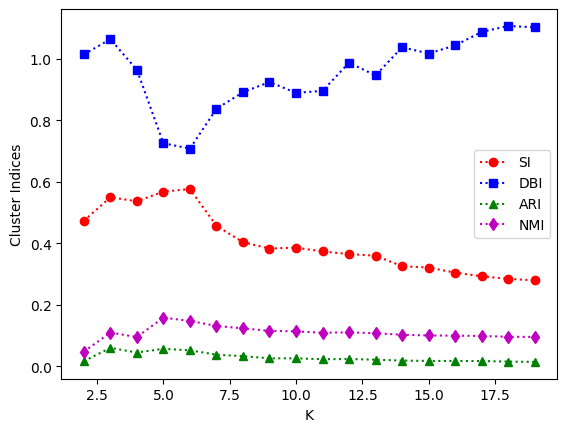

In [43]:

from sklearn import metrics
from sklearn.cluster import KMeans

# Set possible values for K
k_vals=range(2,20)

# Empty arrays for internal measures
sShil_max = np.empty([len(k_vals),1])
sDaBo_min = np.empty_like(sShil_max)
rndAdj_max = np.empty_like(sShil_max)
nmi_max = np.empty_like(sShil_max)


for i,n in enumerate(k_vals):
    kmeans = KMeans(n_clusters=n, max_iter=1000, n_init=10, random_state=0).fit(X_train)
    sShil_max[i] = metrics.silhouette_score(X_train,kmeans.labels_)
    sDaBo_min[i] = metrics.davies_bouldin_score(X_train,kmeans.labels_) 
    rndAdj_max[i]= metrics.cluster.adjusted_rand_score(y_train, kmeans.labels_)
    nmi_max[i]=metrics.cluster.normalized_mutual_info_score(y_train, kmeans.labels_)


plt.plot(k_vals, sShil_max, 'o:',c='r')
plt.plot(k_vals, sDaBo_min, 's:',c='b')
plt.plot(k_vals, rndAdj_max, '^:',c='g')
plt.plot(k_vals, nmi_max, 'd:',c='m')
plt.xlabel("K")
plt.ylabel("Cluster Indices")
plt.legend(['SI','DBI','ARI','NMI'])
plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, max_iter=1000, n_init=10, random_state=0,algorithm = "elkan").fit(X_train)
y_pred=kmeans.predict(X_test)


sShil_max = metrics.silhouette_score(X_test,y_pred)
sDaBo_min = metrics.davies_bouldin_score(X_test,y_pred) 
rndAdj_max= metrics.cluster.adjusted_rand_score(y_test, y_pred)
nmi_max= metrics.cluster.normalized_mutual_info_score(y_test, y_pred)

print(f"The SI is {sShil_max}, DBI score is {sDaBo_min}, ARI score is {rndAdj_max}, and NMI score is {nmi_max}.")

# Note: there is no in general prediction for clustering methods in Sklearn. 
# One can fit classification model using the cluster labels, and then do the prediction.

The SI is 0.5550757742382328, DBI score is 1.0609600386312825, ARI score is 0.06307258060872871, and NMI score is 0.11596282987766363.


In [ ]:
# from sklearn import metrics
# from sklearn.cluster import AgglomerativeClustering
# # Set possible values for K
# k_vals=range(2,20)

# # Empty arrays for internal measures
# sShil_max = np.empty([len(k_vals),1])
# sDaBo_min = np.empty_like(sShil_max)
# rndAdj_max = np.empty_like(sShil_max)
# nmi_max = np.empty_like(sShil_max)


# for i,n in enumerate(k_vals):
#     hclus = AgglomerativeClustering(n_clusters=n,linkage="complete").fit(X_train)
#     sShil_max[i] = metrics.silhouette_score(X_train,hclus.labels_)
#     sDaBo_min[i] = metrics.davies_bouldin_score(X_train,hclus.labels_) 
#     rndAdj_max[i]= metrics.cluster.adjusted_rand_score(y_train, hclus.labels_)
#     nmi_max[i]=metrics.cluster.normalized_mutual_info_score(y_train, hclus.labels_)


# plt.plot(k_vals, sShil_max, 'o:',c='r')
# plt.plot(k_vals, sDaBo_min, 's:',c='b')
# plt.plot(k_vals, rndAdj_max, '^:',c='g')
# plt.plot(k_vals, nmi_max, 'd:',c='m')
# plt.xlabel("K")
# plt.ylabel("Cluster Indices")
# plt.legend(['SI','DBI','ARI','NMI'])
# plt.show()

# Model Building

### A. Fitting and Cross-validation

In [46]:
from sklearn import tree
dtClf = tree.DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)
dt_y_pred = dtClf.predict(X_test)

# import matplotlib.pyplot as plt
# plt.figure(figsize =(10,10),dpi=1000)
# tree.plot_tree(dtClf,feature_names=df.columns[:-1].tolist(),class_names=['0','1','2'],filled=True,rounded=True); 
# plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree: \n")
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred) )

Decision Tree: 

Accuracy:= 0.6125302500672224
Confusion Matrix:= 
 [[ 987    3  705]
 [   2  163    1]
 [ 729    1 1128]]


In [47]:
from sklearn.naive_bayes import GaussianNB

NBClf = GaussianNB()
NBClf.fit(X_train,y_train)

print("Class 1:=", NBClf.classes_[0],"\t Class 2:=", NBClf.classes_[1],"\t Class 3:=", NBClf.classes_[2] )

NB_y_pred = NBClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Numerical Data: \n")
print("Accuracy:=",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )

Class 1:= black 	 Class 2:= draw 	 Class 3:= white
NB for Numerical Data: 

Accuracy:= 0.6391503092229094
Confusion Matrix:= 
 [[ 735    0  960]
 [   3  163    0]
 [ 378    1 1479]]


### B. Compare Models

As apparent from the analysis above, most clustering models group the data into 6 classes. Our classification models all achieve close accuracies, the highest being the random forrest with around 65.8 % accuracy. We were not initially happy with the result, but given the dataset's quality, this is an acceptable value to begin with. We could improve it further by applying our models on better and cleaner datasets.

### C. Interpret Findings and Selected Model

In this phase of the Model Building process, we delve into interpreting the results of our analysis and provide insights into the selected model that will drive our subsequent steps. Our approach encompasses a comprehensive evaluation of different models, considering both performance metrics and interpretability.

- Model Evaluation and Metrics

    After rigorous experimentation and cross-validation, we evaluated several classification models on our chess game dataset. We assessed the models' performance using a range of metrics, including accuracy, precision, recall, and F1-score. These metrics collectively offer a comprehensive view of a model's ability to classify chess game outcomes accurately and reliably.

- Selected Model: Random Forrest Classifier

    Our analysis revealed that the Random Forrest Classifier demonstrated the most promising performance across various evaluation metrics. This model exhibited the highest accuracy of 65.8%, reflecting its capability to correctly classify chess game outcomes. In addition, its precision, recall, and F1-score scores consistently outperformed those of alternative classification models.

- Feature Importance

    Through our interpretability analysis, we identified key features that significantly contribute to the model's predictions. Notably, victory status and rating emerged as particularly influential in determining chess game outcomes. These insights align with our domain knowledge and provide valuable strategic insights for players and enthusiasts alike.

- Implications and Next Steps

    Our selected model, the random forrest classifier, achieves a balance between accuracy and interpretability, making it well-suited for real-world deployment. The insights gained from interpretability techniques offer a deeper understanding of the decision-making process and provide actionable information for stakeholders.

As we proceed to the Operationalize phase, we will refine our pipeline for deployment, addressing considerations such as model monitoring and maintenance. We recognize the importance of responsible AI and will continue to ensure that our model adheres to ethical standards while delivering reliable and valuable predictions.

In summary, our Model Building phase has led us to the selection of the Random Forrest Classifier based on its impressive performance metrics and interpretability. The insights gained from this phase will serve as a foundation for further refining our methodology and transitioning to the next phase of our data science project.




